# Project: Investigate Dataset of TMDb Movies
## Table of Contents:
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusion

## 1. Introduction:
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

 * Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)
characters.

 * There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

 * The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question that will be covered in EDA Section:
    Reseach Question 1: What are the properites associated with high revenue?
    Reseach Question 2: What about the time effect on data? 
    Reseach Question 3: What are the properites associated with high votes?

In [427]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [428]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Wrangling:

## 1. Drop the unuseful columns
(id , imdb_id, budget, revenue, homepage, tagline, keywords, overview, production_companies)

Note: budget_adj and revenue_adj show the budget and revenue of the associated movie in terms of 2010 dollars values, accounting for inflation over time. (Normalization Process)
This tells us that there is no need of budget and revenue column

In [429]:
drop_col = ['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df.drop(drop_col, axis=1, inplace=True)

## 3. Investigate duplicates and drop them

In [430]:
df.duplicated().sum()

1

In [431]:
df[df.duplicated() == True]

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [432]:
df.shape

(10866, 12)

In [433]:
df.drop_duplicates(inplace=True)

In [434]:
df.shape

(10865, 12)

## 3. Investigate the missing data

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   cast            10789 non-null  object 
 3   director        10821 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
 10  budget_adj      10865 non-null  float64
 11  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [436]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 2.1 Drop the rows with missing data

In [437]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10731 non-null  float64
 1   original_title  10731 non-null  object 
 2   cast            10731 non-null  object 
 3   director        10731 non-null  object 
 4   runtime         10731 non-null  int64  
 5   genres          10731 non-null  object 
 6   release_date    10731 non-null  object 
 7   vote_count      10731 non-null  int64  
 8   vote_average    10731 non-null  float64
 9   release_year    10731 non-null  int64  
 10  budget_adj      10731 non-null  float64
 11  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1006.2+ KB


## 1. Manipulate Categorical Data:

#### 1.1 Genres
We took only first two genres of each movie (as third genre is missing more than 50% of its data)

In [438]:
genres_df = df['genres'].str.split("|", expand=True)
genres_df.rename(columns={0: 'prim_genre',
                         1: 'second_genre'}, inplace=True)

#look the missing data
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prim_genre    10731 non-null  object
 1   second_genre  8460 non-null   object
 2   2             5051 non-null   object
 3   3             1972 non-null   object
 4   4             539 non-null    object
dtypes: object(5)
memory usage: 419.3+ KB


In [439]:
#concatenate the new two columns to the dataframe (df)
df[genres_df.columns[:2]] = genres_df.iloc[:, :2]

#drop the genres old column
df.drop('genres', axis=1, inplace=True)

In [440]:
df

,popularity,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,prim_genre,second_genre
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary,None
10727,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Action,Adventure
10728,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery,Comedy
10729,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Comedy


#### 1.2 Cast
We took only first two heros (actors) of any movie

In [441]:
cast_df = df['cast'].str.split("|", expand=True)
cast_df.rename(columns={0: 'prim_actor',
                         1: 'second_actor',
                         }, inplace=True)
cast_df

,prim_actor,second_actor,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
...,...,...,...,...,...
10726,Michael Hynson,Robert August,Lord 'Tally Ho' Blears,Bruce Brown,Chip Fitzwater
10727,James Garner,Eva Marie Saint,Yves Montand,ToshirÅ Mifune,Brian Bedford
10728,Innokentiy Smoktunovskiy,Oleg Efremov,Georgi Zhzhyonov,Olga Aroseva,Lyubov Dobrzhanskaya
10729,Tatsuya Mihashi,Akiko Wakabayashi,Mie Hama,John Sebastian,Tadao Nakamaru


In [442]:
#concatenate the new two columns to the dataframe (df)
df[cast_df.columns[:2]] = cast_df.iloc[:,:2]

#drop the cast old column
df.drop('cast', axis=1, inplace=True)

In [443]:
df

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor
0,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard
1,28.419936,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron
2,13.112507,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill
4,9.335014,Furious 7,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,0.080598,The Endless Summer,Bruce Brown,95,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary,None,Michael Hynson,Robert August
10727,0.065543,Grand Prix,John Frankenheimer,176,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Action,Adventure,James Garner,Eva Marie Saint
10728,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery,Comedy,Innokentiy Smoktunovskiy,Oleg Efremov
10729,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Comedy,Tatsuya Mihashi,Akiko Wakabayashi


#### 1.3 Director
We took only the primary director

In [444]:
direct_df = df['director'].str.split("|", expand=True)
direct_df.rename(columns={0: 'prim_director'
                         }, inplace=True)

In [445]:
#concatenate the new column to the dataframe (df)
df['prim_director'] = direct_df.loc[:,'prim_director']

#drop the old director column
df.drop('director', axis=1, inplace=True)

In [446]:
df

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow
1,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron,George Miller
2,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James,Robert Schwentke
3,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill,J.J. Abrams
4,9.335014,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker,James Wan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,0.080598,The Endless Summer,95,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary,None,Michael Hynson,Robert August,Bruce Brown
10727,0.065543,Grand Prix,176,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Action,Adventure,James Garner,Eva Marie Saint,John Frankenheimer
10728,0.065141,Beregis Avtomobilya,94,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery,Comedy,Innokentiy Smoktunovskiy,Oleg Efremov,Eldar Ryazanov
10729,0.064317,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Comedy,Tatsuya Mihashi,Akiko Wakabayashi,Woody Allen


## 2. Manipulating Numerical Data:

In [447]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 2.1 Profit = revenue - budget
Append a new column with the profit of each movie to use in data analysis

In [448]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

### 2.2 Parsing Date
Change date dtype from object to datetime using pandas, to extract any day, month or year we want using pandas built-in functions like: dt.day, dt.year, dt.month

In [449]:
#first change the release year column to str, to use it in making parsing date
df['release_year'] = df['release_year'].astype(str)

In [450]:
#make a new series, with the new date formate as following:
date_df = df['release_date'].str[:-2] + df['release_year']

In [451]:
date_df

0          6/9/2015
1         5/13/2015
2         3/18/2015
3        12/15/2015
4          4/1/2015
            ...    
10726     6/15/1966
10727    12/21/1966
10728      1/1/1966
10729     11/2/1966
10730    11/15/1966
Length: 10731, dtype: object

In [452]:
#use pandas datetime function to make a datetime type column
date_df = pd.to_datetime(date_df, format="%m/%d/%Y")

In [453]:
date_df

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10726   1966-06-15
10727   1966-12-21
10728   1966-01-01
10729   1966-11-02
10730   1966-11-15
Length: 10731, dtype: datetime64[ns]

In [454]:
#drop the old release date column (unformatted one)
df.drop('release_date', axis=1, inplace=True)

In [455]:
#create new column with datetime format
df['release_date'] = date_df

In [456]:
#drop release year column, as the full info about date is now in release date column, you can extract year using df[[].dt.year
df.drop('release_year', axis=1, inplace=True)

In [457]:
#as following
df['release_date'].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10726    1966
10727    1966
10728    1966
10729    1966
10730    1966
Name: release_date, Length: 10731, dtype: int64

In [458]:
#now dtype of release_date column has changed from object to datetime 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10731 non-null  float64       
 1   original_title  10731 non-null  object        
 2   runtime         10731 non-null  int64         
 3   vote_count      10731 non-null  int64         
 4   vote_average    10731 non-null  float64       
 5   budget_adj      10731 non-null  float64       
 6   revenue_adj     10731 non-null  float64       
 7   prim_genre      10731 non-null  object        
 8   second_genre    8460 non-null   object        
 9   prim_actor      10731 non-null  object        
 10  second_actor    10594 non-null  object        
 11  prim_director   10731 non-null  object        
 12  profit_adj      10731 non-null  float64       
 13  release_date    10731 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)


In [459]:
df.head()

,popularity,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director,profit_adj,release_date
0,32.985763,Jurassic World,124,5562,6.5,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,1.254446e+09,2015-06-09
1,28.419936,Mad Max: Fury Road,120,6185,7.1,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron,George Miller,2.101614e+08,2015-05-13
2,13.112507,Insurgent,119,2480,6.3,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James,Robert Schwentke,1.704191e+08,2015-03-18
3,11.173104,Star Wars: The Force Awakens,136,5292,7.5,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill,J.J. Abrams,1.718723e+09,2015-12-15
4,9.335014,Furious 7,137,2947,7.3,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker,James Wan,1.210949e+09,2015-04-01


### 2.3 Converting runtime to categorical data
to get a short/long movie indicator, i can use it in my analysis

<AxesSubplot:>

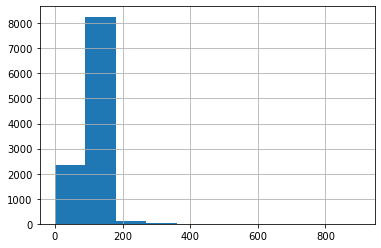

In [460]:
df['runtime'].hist()
#i will use the median not the mean as my data is right skewed

In [461]:
short_movies = df[df['runtime'] <= df['runtime'].median()]
long_movies = df[df['runtime'] > df['runtime'].median()]
df['movie_duration'] = pd.Series([])

<ipython-input-461-967ca267c450>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['movie_duration'] = pd.Series([])


In [462]:
df.loc[short_movies.index, 'movie_duration'] = 'short_movie'
df.loc[long_movies.index, 'movie_duration'] = 'long_movie'

### 2.4 Vote count normalization, to get a standard vote average, depending on number of total votes
if we use the given data of average votes, that will be unfair, there is a factor we mustn't ignore, the factor of votes count
so we normalize this factor and multiply it wil vote average to get the pure/real average votes (adjacent)

In [463]:
df['vote_adj'] = ((df['vote_count'] - df['vote_count'].min()) / (df['vote_count'].max() - df['vote_count'].min())) * df['vote_average']
df

,popularity,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director,profit_adj,release_date,movie_duration,vote_adj
0,32.985763,Jurassic World,124,5562,6.5,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,1.254446e+09,2015-06-09,long_movie,3.698678
1,28.419936,Mad Max: Fury Road,120,6185,7.1,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron,George Miller,2.101614e+08,2015-05-13,long_movie,4.493441
2,13.112507,Insurgent,119,2480,6.3,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James,Robert Schwentke,1.704191e+08,2015-03-18,long_movie,1.594855
3,11.173104,Star Wars: The Force Awakens,136,5292,7.5,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill,J.J. Abrams,1.718723e+09,2015-12-15,long_movie,4.060162
4,9.335014,Furious 7,137,2947,7.3,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker,James Wan,1.210949e+09,2015-04-01,long_movie,2.197407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,0.080598,The Endless Summer,95,11,7.4,0.000000e+00,0.000000e+00,Documentary,None,Michael Hynson,Robert August,Bruce Brown,0.000000e+00,1966-06-15,short_movie,0.000758
10727,0.065543,Grand Prix,176,20,5.7,0.000000e+00,0.000000e+00,Action,Adventure,James Garner,Eva Marie Saint,John Frankenheimer,0.000000e+00,1966-12-21,long_movie,0.005842
10728,0.065141,Beregis Avtomobilya,94,11,6.5,0.000000e+00,0.000000e+00,Mystery,Comedy,Innokentiy Smoktunovskiy,Oleg Efremov,Eldar Ryazanov,0.000000e+00,1966-01-01,short_movie,0.000666
10729,0.064317,"What's Up, Tiger Lily?",80,22,5.4,0.000000e+00,0.000000e+00,Action,Comedy,Tatsuya Mihashi,Akiko Wakabayashi,Woody Allen,0.000000e+00,1966-11-02,short_movie,0.006641


### Let's take a look
1: vote_average test, seems to be depending on the vote average only, ignoring the vote count (number of people who participate in the vote)

2: in the other hand, and after normalization, vote adj took into account the number of people who voted,,
that's cool and more realistic

for sure, Interstaller, Avatar and Inception is higher in rate than Jurassic World, Mad Max and Insurgent

In [464]:
df[df['vote_average'] > 5].head(5)

,popularity,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director,profit_adj,release_date,movie_duration,vote_adj
0,32.985763,Jurassic World,124,5562,6.5,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,1.254446e+09,2015-06-09,long_movie,3.698678
1,28.419936,Mad Max: Fury Road,120,6185,7.1,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron,George Miller,2.101614e+08,2015-05-13,long_movie,4.493441
2,13.112507,Insurgent,119,2480,6.3,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James,Robert Schwentke,1.704191e+08,2015-03-18,long_movie,1.594855
3,11.173104,Star Wars: The Force Awakens,136,5292,7.5,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill,J.J. Abrams,1.718723e+09,2015-12-15,long_movie,4.060162
4,9.335014,Furious 7,137,2947,7.3,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker,James Wan,1.210949e+09,2015-04-01,long_movie,2.197407


In [465]:
df[df['vote_adj'] > 5].head(5)
#Seems realistic

,popularity,original_title,runtime,vote_count,vote_average,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director,profit_adj,release_date,movie_duration,vote_adj
617,24.949134,Interstellar,169,6498,8.0,1.519800e+08,5.726906e+08,Adventure,Drama,Matthew McConaughey,Jessica Chastain,Christopher Nolan,4.207106e+08,2014-11-05,long_movie,5.319668
1355,9.432768,Avatar,162,8458,7.1,2.408869e+08,2.827124e+09,Action,Adventure,Sam Worthington,Zoe Saldana,James Cameron,2.586237e+09,2009-12-10,long_movie,6.147463
1880,9.363643,Inception,148,9767,7.9,1.600000e+08,8.255000e+08,Action,Thriller,Leonardo DiCaprio,Joseph Gordon-Levitt,Christopher Nolan,6.655000e+08,2010-07-14,long_movie,7.900000
2356,7.753899,The Matrix,136,6351,7.8,8.247033e+07,6.067687e+08,Action,Science Fiction,Keanu Reeves,Laurence Fishburne,Lilly Wachowski,5.242984e+08,1999-03-30,long_movie,5.069161
2820,8.466668,The Dark Knight,152,8432,8.1,1.873655e+08,1.014733e+09,Drama,Action,Christian Bale,Michael Caine,Christopher Nolan,8.273675e+08,2008-07-16,long_movie,6.991719


In [466]:
#so we will drop vote_average column, as it's not useful now
df.drop('vote_average', axis=1, inplace=True)
df

,popularity,original_title,runtime,vote_count,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director,profit_adj,release_date,movie_duration,vote_adj
0,32.985763,Jurassic World,124,5562,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,1.254446e+09,2015-06-09,long_movie,3.698678
1,28.419936,Mad Max: Fury Road,120,6185,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron,George Miller,2.101614e+08,2015-05-13,long_movie,4.493441
2,13.112507,Insurgent,119,2480,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James,Robert Schwentke,1.704191e+08,2015-03-18,long_movie,1.594855
3,11.173104,Star Wars: The Force Awakens,136,5292,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill,J.J. Abrams,1.718723e+09,2015-12-15,long_movie,4.060162
4,9.335014,Furious 7,137,2947,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker,James Wan,1.210949e+09,2015-04-01,long_movie,2.197407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,0.080598,The Endless Summer,95,11,0.000000e+00,0.000000e+00,Documentary,None,Michael Hynson,Robert August,Bruce Brown,0.000000e+00,1966-06-15,short_movie,0.000758
10727,0.065543,Grand Prix,176,20,0.000000e+00,0.000000e+00,Action,Adventure,James Garner,Eva Marie Saint,John Frankenheimer,0.000000e+00,1966-12-21,long_movie,0.005842
10728,0.065141,Beregis Avtomobilya,94,11,0.000000e+00,0.000000e+00,Mystery,Comedy,Innokentiy Smoktunovskiy,Oleg Efremov,Eldar Ryazanov,0.000000e+00,1966-01-01,short_movie,0.000666
10729,0.064317,"What's Up, Tiger Lily?",80,22,0.000000e+00,0.000000e+00,Action,Comedy,Tatsuya Mihashi,Akiko Wakabayashi,Woody Allen,0.000000e+00,1966-11-02,short_movie,0.006641


In [467]:
#save the wrangled data

df.to_csv('Wrangled_Data.csv', index=False)

# Exploratory Data Analysis

## Reseach Question 1: What are the properites associated with high revenue?
High revenue is an important indicator in movie industry, using this indicator will help us in data analysis and how to extract the useful info from it:
1. like the relation between budget and revenue, is there any relation between them? positive or negative? what this relation indicates? if we answer these questions we can learn how to make a good movie.
2. another relation is the relation between votes and revenue, does the movie with high revenue collected the highest votes? is it a positive relation? 
3. Does the runtime of movie affects in revenue?
4. the genre? 
5. actors and directors? 

And so on, there's many relations in this section i covered, it's very useful.

In [468]:
import seaborn as sns

C:\Users\THE LAPTOP SHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Revenue in 100 million'>

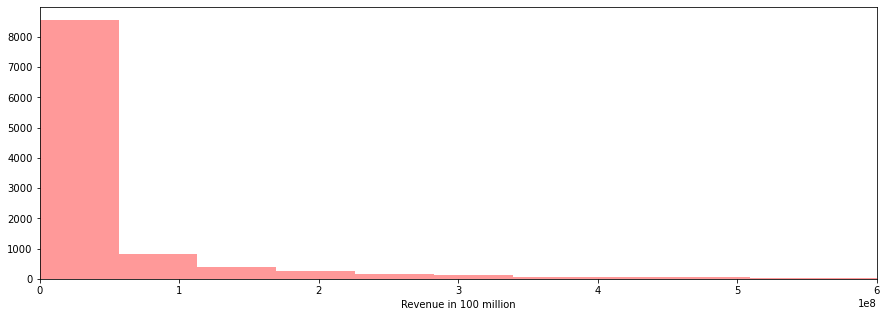

In [469]:
#the revenue data is right skewed as we see
plt.figure(figsize=(15,5))
plt.xlim(0,6*10**8)
plt.xlabel('Revenue in 100 million')
sns.distplot(x= df['revenue_adj'], kde=False, color='red')

In [470]:
def Plot(col1, col2, pltype):
#function that take name of two columns of dataframe (df) and type of plot.
#plot a relation between the two columns
#it can plot, regression line (regplot) to get the correlation
#it can also plot bar plots
#it can also plot line plots used in timelines
    if pltype == 'regplot':
        plt.figure(figsize=(10,5))
        sns.regplot(y=df[col1], x=df[col2])
    elif pltype == 'barplot':
        plt.figure(figsize=(25,7))
        sns.barplot(y=df[col1], x=df[col2])
    elif pltype == 'lineplot':
        plt.figure(figsize=(12,5))
        sns.lineplot(y=df[col1], x=df[col2])

### Revenue vs Budget

Text(0, 0.5, 'Budget in 100 million')

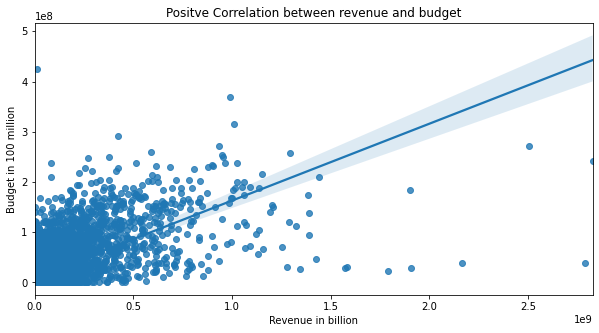

In [471]:

Plot('budget_adj', 'revenue_adj', 'regplot')
plt.title('Positve Correlation between revenue and budget')
plt.xlabel('Revenue in billion')
plt.ylabel('Budget in 100 million')

### Revenue vs Vote Average

Text(0, 0.5, 'Votes average')

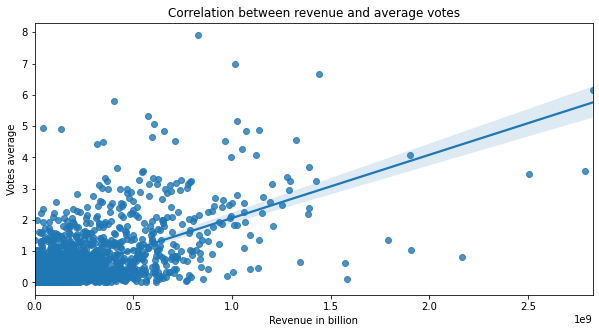

In [472]:
Plot('vote_adj', 'revenue_adj', 'regplot')
plt.title('Correlation between revenue and average votes')
plt.xlabel('Revenue in billion')
plt.ylabel('Votes average')

### Revenue vs Vote Count

Text(0, 0.5, 'Vote Count')

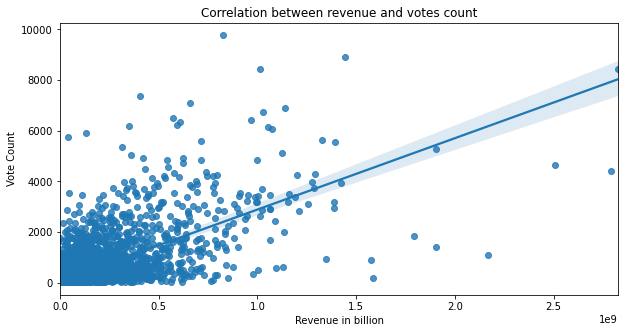

In [473]:
Plot('vote_count', 'revenue_adj', 'regplot')
plt.title('Correlation between revenue and votes count')
plt.xlabel('Revenue in billion')
plt.ylabel('Vote Count')

### Revenue vs Movie Duration

Text(0, 0.5, 'Vote Count')

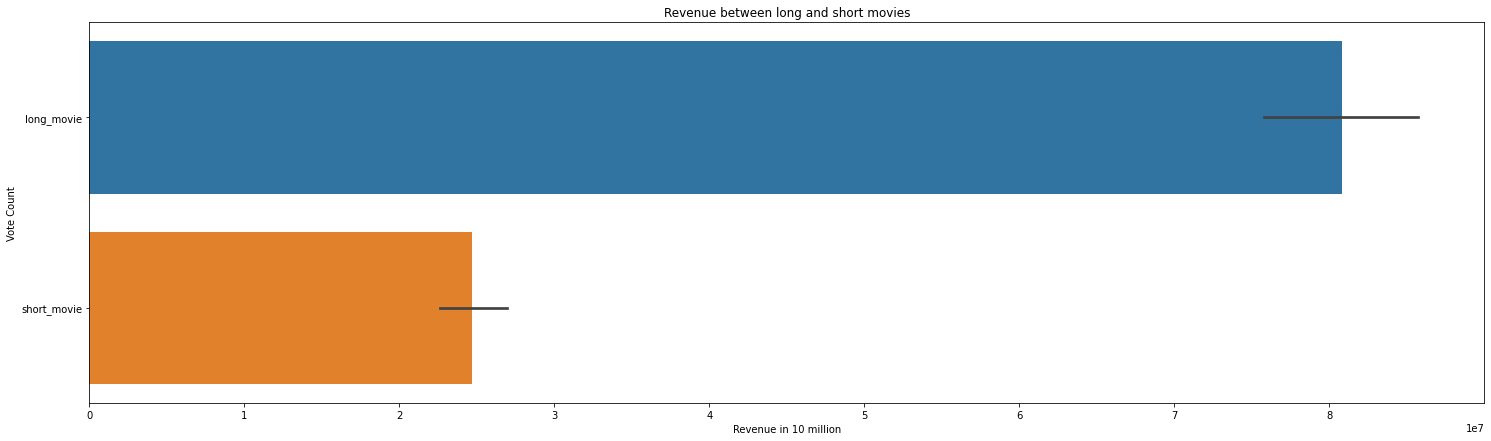

In [474]:
Plot('movie_duration','revenue_adj', 'barplot')
plt.title('Revenue between long and short movies')
plt.xlabel('Revenue in 10 million')
plt.ylabel('Vote Count')

### Revenue vs Popularity

Text(0, 0.5, 'Popularity')

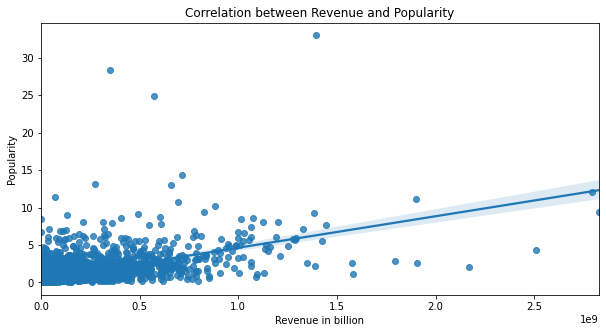

In [475]:
Plot('popularity', 'revenue_adj', 'regplot')
plt.title('Correlation between Revenue and Popularity')
plt.xlabel('Revenue in billion')
plt.ylabel('Popularity')

### Revenue vs Primary Genre
Top revenue according to primary genre:
1. Adventure
2. Science Fiction
3. Fantasy

Text(0.5, 0, 'Primary Genre')

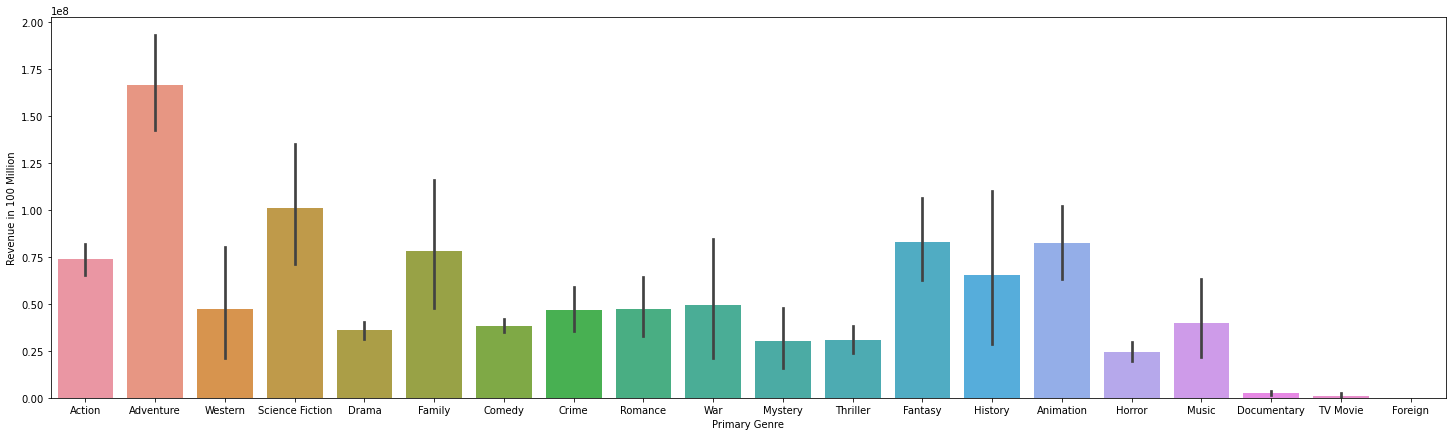

In [476]:
Plot('revenue_adj', 'prim_genre', 'barplot')
plt.ylabel('Revenue in 100 Million')
plt.xlabel('Primary Genre')

### Revenue vs Secondary Genre
Top revenue according to secondary genre:
1. Fantasy
2. Action
3. Adventure

Text(0.5, 0, 'Secondary Genre')

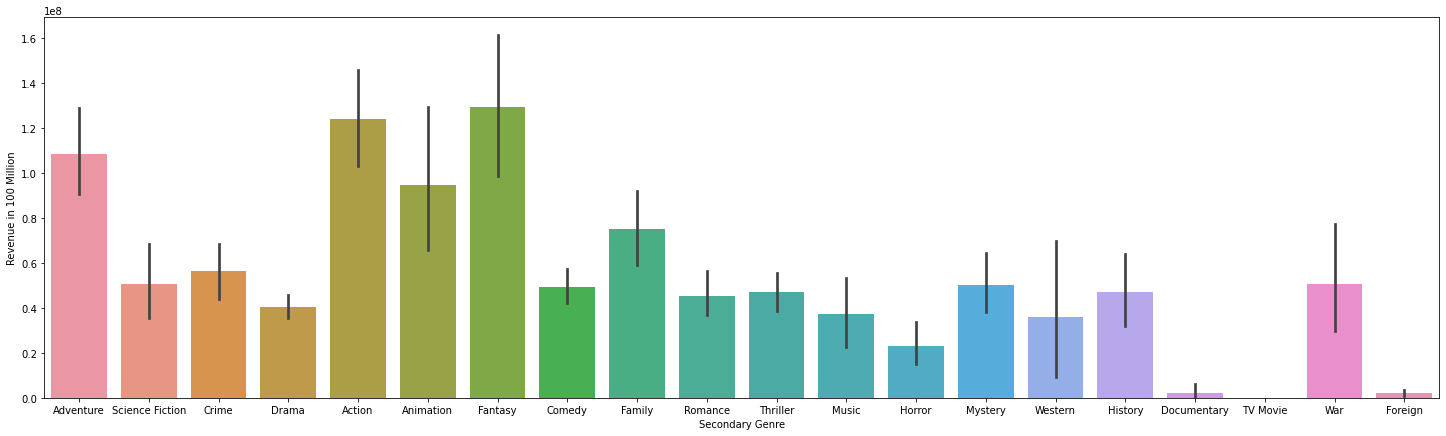

In [477]:
Plot('revenue_adj', 'second_genre', 'barplot')
plt.ylabel('Revenue in 100 Million')
plt.xlabel('Secondary Genre')

### Genres of Maximum revenues (TOP 3)

In [478]:
df.groupby(['prim_genre', 'second_genre'])['revenue_adj'].max().sort_values(ascending=False)[:3]

prim_genre  second_genre
Action      Adventure       2.827124e+09
Adventure   Action          2.789712e+09
Drama       Romance         2.506406e+09
Name: revenue_adj, dtype: float64

### Genres of highest revenues  (TOP 3) (Average)

In [479]:
df.groupby(['prim_genre'])['revenue_adj'].mean().sort_values(ascending=False)[:3]

prim_genre
Adventure          1.668203e+08
Science Fiction    1.009330e+08
Fantasy            8.314328e+07
Name: revenue_adj, dtype: float64

In [480]:
df.groupby(['second_genre'])['revenue_adj'].mean().sort_values(ascending=False)[:3]

second_genre
Fantasy      1.296470e+08
Action       1.239511e+08
Adventure    1.083989e+08
Name: revenue_adj, dtype: float64

### Maximum revenues according to actors and the movie (TOP 3)

In [481]:
df.groupby(['prim_actor', 'second_actor', 'original_title'])['revenue_adj'].max().sort_values(ascending=False)[:3]

prim_actor       second_actor       original_title
Sam Worthington  Zoe Saldana        Avatar            2.827124e+09
Mark Hamill      Harrison Ford      Star Wars         2.789712e+09
Kate Winslet     Leonardo DiCaprio  Titanic           2.506406e+09
Name: revenue_adj, dtype: float64

### Actors of highest revenues (Average)

In [482]:
df.groupby(['prim_actor'])['revenue_adj'].mean().sort_values(ascending=False)[:3]

prim_actor
Mark Hamill        1.367039e+09
Chris Pratt        1.052369e+09
William Moseley    8.360904e+08
Name: revenue_adj, dtype: float64

In [483]:
df.groupby(['second_actor'])['revenue_adj'].mean().sort_values(ascending=False)[:3]

second_actor
J. Pat O'Malley       1.574815e+09
Sebastian Cabot       1.345551e+09
FranÃ§ois Truffaut    1.092965e+09
Name: revenue_adj, dtype: float64

### Directors of Highest revenues (TOP 3) (Average)

In [484]:
df.groupby(['prim_director'])['revenue_adj'].mean().sort_values(ascending=False)[:3]

prim_director
Clyde Geronimi    1.574815e+09
George Lucas      1.052320e+09
Lee Unkrich       8.781367e+08
Name: revenue_adj, dtype: float64

### Movies that gained the highest revenues and their directors (TOP 3)

In [485]:
df.groupby(['original_title','prim_director'])['revenue_adj'].max().sort_values(ascending=False)[:3]

original_title  prim_director
Avatar          James Cameron    2.827124e+09
Star Wars       George Lucas     2.789712e+09
Titanic         James Cameron    2.506406e+09
Name: revenue_adj, dtype: float64

## Reseach Question 2: What about the time effect on data? 
The time factor is very important in this process, as how the time affect the graphs ups and downs
in this section i am trying to extract useful info from the data regarding the timem Like: 
1. The movies direction is toward the short or the long movies? 
2. Movies budgets over time
3. Movies profits over time
4. Top profits according to profit_adj indicator

In [486]:
df['release_year'] = df['release_date'].dt.year

In [487]:
df

,popularity,original_title,runtime,vote_count,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director,profit_adj,release_date,movie_duration,vote_adj,release_year
0,32.985763,Jurassic World,124,5562,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,1.254446e+09,2015-06-09,long_movie,3.698678,2015
1,28.419936,Mad Max: Fury Road,120,6185,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron,George Miller,2.101614e+08,2015-05-13,long_movie,4.493441,2015
2,13.112507,Insurgent,119,2480,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James,Robert Schwentke,1.704191e+08,2015-03-18,long_movie,1.594855,2015
3,11.173104,Star Wars: The Force Awakens,136,5292,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill,J.J. Abrams,1.718723e+09,2015-12-15,long_movie,4.060162,2015
4,9.335014,Furious 7,137,2947,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker,James Wan,1.210949e+09,2015-04-01,long_movie,2.197407,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,0.080598,The Endless Summer,95,11,0.000000e+00,0.000000e+00,Documentary,None,Michael Hynson,Robert August,Bruce Brown,0.000000e+00,1966-06-15,short_movie,0.000758,1966
10727,0.065543,Grand Prix,176,20,0.000000e+00,0.000000e+00,Action,Adventure,James Garner,Eva Marie Saint,John Frankenheimer,0.000000e+00,1966-12-21,long_movie,0.005842,1966
10728,0.065141,Beregis Avtomobilya,94,11,0.000000e+00,0.000000e+00,Mystery,Comedy,Innokentiy Smoktunovskiy,Oleg Efremov,Eldar Ryazanov,0.000000e+00,1966-01-01,short_movie,0.000666,1966
10729,0.064317,"What's Up, Tiger Lily?",80,22,0.000000e+00,0.000000e+00,Action,Comedy,Tatsuya Mihashi,Akiko Wakabayashi,Woody Allen,0.000000e+00,1966-11-02,short_movie,0.006641,1966


### 1. Movie runtime decreased with respect to time

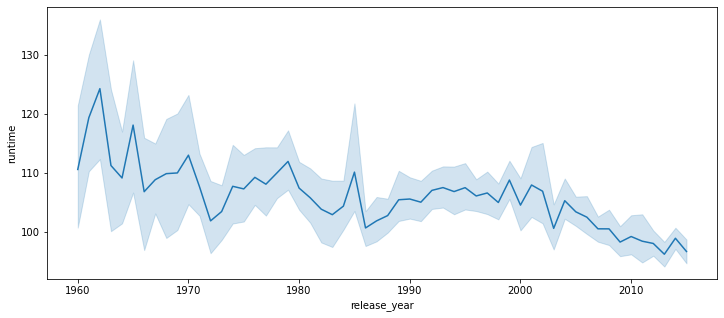

In [488]:
Plot('runtime','release_year', 'lineplot')

### 2. The movies budget witnessed an increase in the period between 1999 and 2001 and decreased again

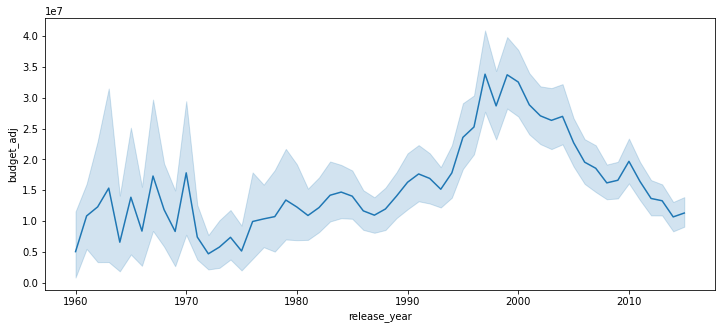

In [489]:
Plot('budget_adj','release_year', 'lineplot')

### 3. The movies profits seems to be steady in the last 10 year

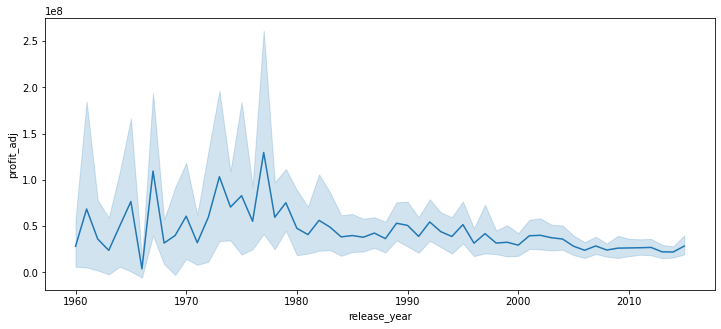

In [490]:
Plot('profit_adj','release_year', 'lineplot')

In [491]:
# Top profits in 60s
df.groupby('release_year')['profit_adj'].max()[:3]

release_year
1960    3.539024e+08
1961    1.545635e+09
1962    4.216943e+08
Name: profit_adj, dtype: float64

### 3. Vote count (Number of people who voted movies) is increasing over time

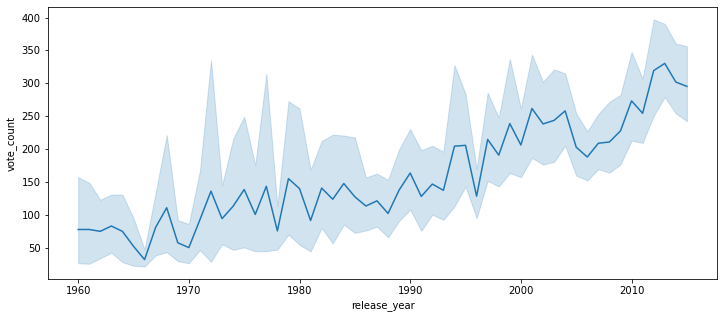

In [492]:
Plot('vote_count', 'release_year', 'lineplot')

### Movies density
The kde is left skewed, most of the movies are in the last 20 years

<AxesSubplot:xlabel='release_year', ylabel='Density'>

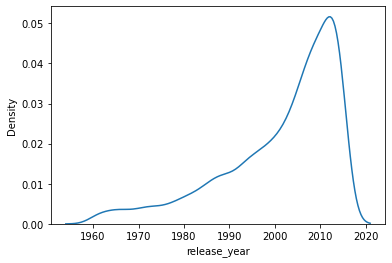

In [493]:
sns.kdeplot(x=df['release_year'])

## Reseach Question 3: What are the properites associated with high votes?
I consider this as the most important question in this data, people's opinions (VOTES), the most valuable indicator about the success and failure of any movie, i covered the following: 
1. Top 5 movies/actors/genres in votes
2. Long or short movies have the highest votes?
3. Highest primary/secondary genre in votes
4. Do budgets play an role in the votes?


In [494]:
df.head()

,popularity,original_title,runtime,vote_count,budget_adj,revenue_adj,prim_genre,second_genre,prim_actor,second_actor,prim_director,profit_adj,release_date,movie_duration,vote_adj,release_year
0,32.985763,Jurassic World,124,5562,1.379999e+08,1.392446e+09,Action,Adventure,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,1.254446e+09,2015-06-09,long_movie,3.698678,2015
1,28.419936,Mad Max: Fury Road,120,6185,1.379999e+08,3.481613e+08,Action,Adventure,Tom Hardy,Charlize Theron,George Miller,2.101614e+08,2015-05-13,long_movie,4.493441,2015
2,13.112507,Insurgent,119,2480,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Shailene Woodley,Theo James,Robert Schwentke,1.704191e+08,2015-03-18,long_movie,1.594855,2015
3,11.173104,Star Wars: The Force Awakens,136,5292,1.839999e+08,1.902723e+09,Action,Adventure,Harrison Ford,Mark Hamill,J.J. Abrams,1.718723e+09,2015-12-15,long_movie,4.060162,2015
4,9.335014,Furious 7,137,2947,1.747999e+08,1.385749e+09,Action,Crime,Vin Diesel,Paul Walker,James Wan,1.210949e+09,2015-04-01,long_movie,2.197407,2015


### 1. Movies/Actors/Genres gained the highest rate in this dataset (TOP 5)

In [495]:
df.groupby(['original_title','prim_actor', 'second_actor', 'prim_genre', 'second_genre'])['vote_adj'].max().sort_values(ascending=False)[:5]

original_title    prim_actor         second_actor          prim_genre       second_genre
Inception         Leonardo DiCaprio  Joseph Gordon-Levitt  Action           Thriller        7.900000
The Dark Knight   Christian Bale     Michael Caine         Drama            Action          6.991719
The Avengers      Robert Downey Jr.  Chris Evans           Science Fiction  Action          6.653572
Avatar            Sam Worthington    Zoe Saldana           Action           Adventure       6.147463
Django Unchained  Jamie Foxx         Christoph Waltz       Drama            Western         5.812289
Name: vote_adj, dtype: float64

### 2. Long movies are higher in vote than short movies

Text(0.5, 1.0, 'Movie Duration vs Votes')

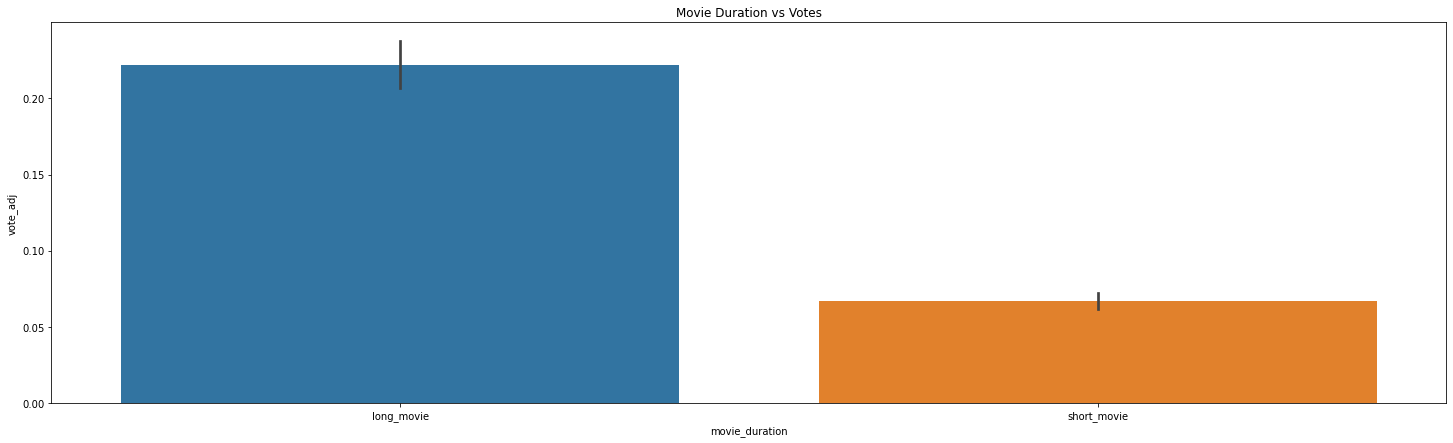

In [496]:
Plot('vote_adj', 'movie_duration', 'barplot')
plt.title("Movie Duration vs Votes")

### 3. Highest primary genres in votes

Text(0.5, 1.0, 'Primary Generes vs Votes')

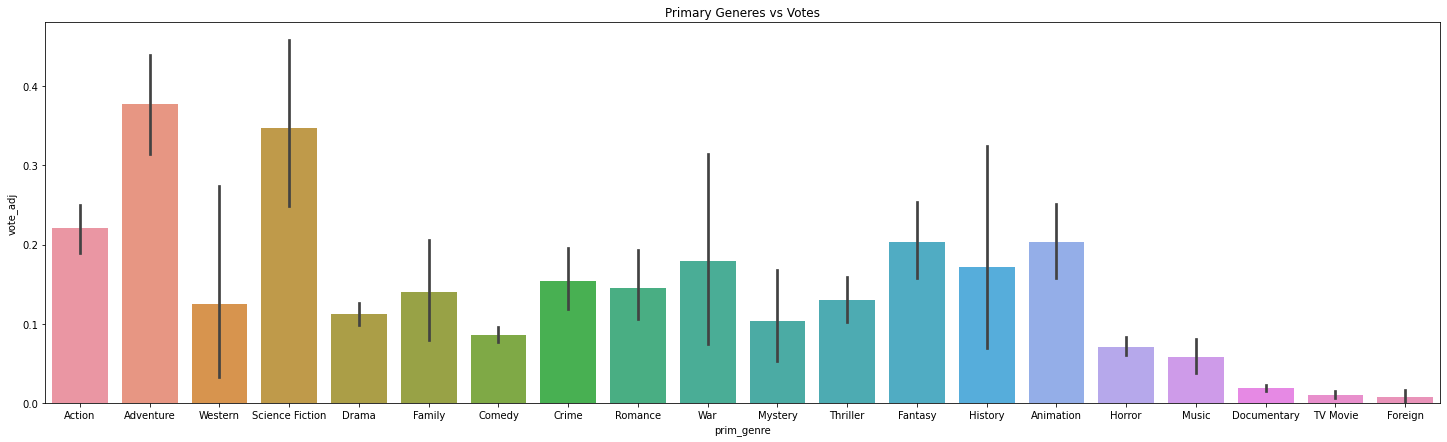

In [497]:
Plot('vote_adj', 'prim_genre', 'barplot')
plt.title("Primary Generes vs Votes")

### 4. Highest seconadary genres in votes

Text(0.5, 1.0, 'Secondary Generes vs Votes')

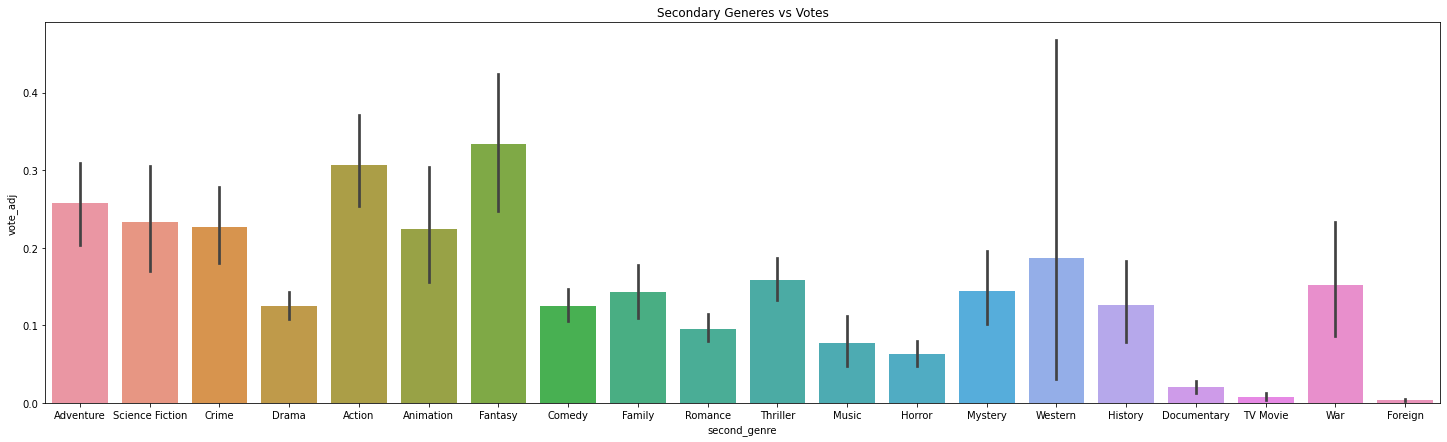

In [498]:
Plot('vote_adj', 'second_genre', 'barplot')
plt.title("Secondary Generes vs Votes")

### 5. Votes correlation with revenues

Text(0.5, 1.0, 'Votes correlation with budget')

<Figure size 576x360 with 0 Axes>

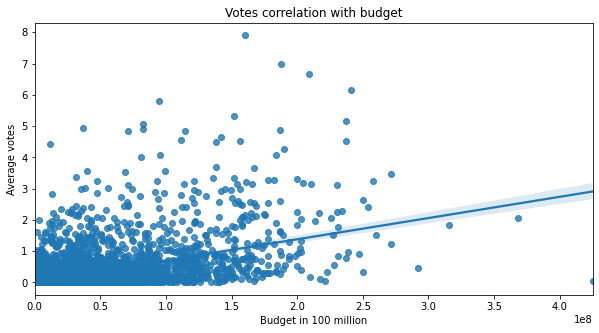

In [499]:
plt.figure(figsize=(8,5))
Plot('vote_adj', 'budget_adj', 'regplot')
plt.xlabel('Budget in 100 million')
plt.ylabel('Average votes')
plt.title("Votes correlation with budget")

# Conclusion:
Now we have answered the three questions very well.
We extracted the summary of the data, by knowing the relation between its variables.
Also we can predict the future values of any data column as we drawn the regression best fit line, used in machine learning models.

According to this analysis process, we now know the top genres, top actors, top directors, we also know the highest revenues and the profit of some movies, we also know the top rated (voted) movies, we also know the time effectivness on the movie industry and how it acts with the time

## Limitations:
The movies release date is left skewed (most of the movies are between 2000 and 2020), that limit the analysis and makes the process biased, the standard deviation must be high in release date.
this is the only limitation i recognized!

In [505]:
limit = pd.DataFrame(df['release_year'].describe())

In [506]:
limit

,release_year
count,10731.000000
mean,2001.259622
std,12.820151
min,1960.000000
25%,1995.000000
50%,2006.000000
75%,2011.000000
max,2015.000000
